# PyTorch Computer vision neural network

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

2.8.0+cpu
0.23.0+cpu


# 1. Getting a dataset

In [2]:
## Setup training data

train_data = datasets.FashionMNIST(
    root="data", # where to downlode data to?
    train=True, # do we whant the training dataset?
    download=True, # do we whant ro download? yes/no
    transform=ToTensor(), # how do we whnat to transforn the data
    target_transform=None #how do we whant to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, labels = train_data[0]
image, labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## 1.1 Check shape

In [7]:
print(f"Image shape: {image.shape} -> [color channels(one color channele for black & white for present dataset), height, width]")
print(f"Image Label: {class_names[labels]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels(one color channele for black & white for present dataset), height, width]
Image Label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

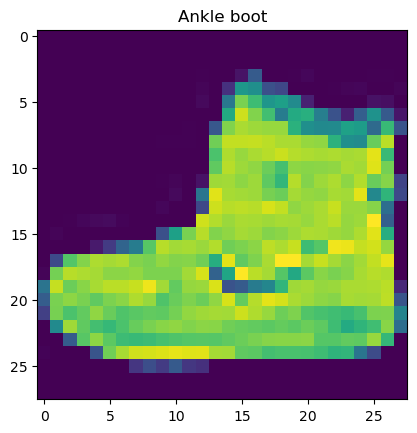

In [8]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # for gray scale image, remove dim="1" fm image.shape, 
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

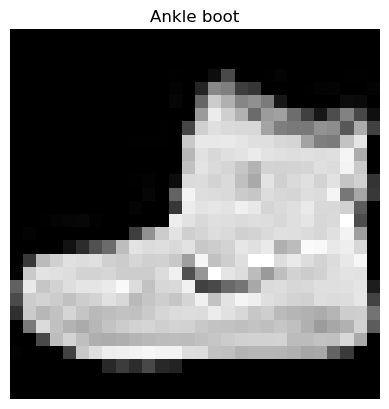

In [9]:
# print image in grey scale

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


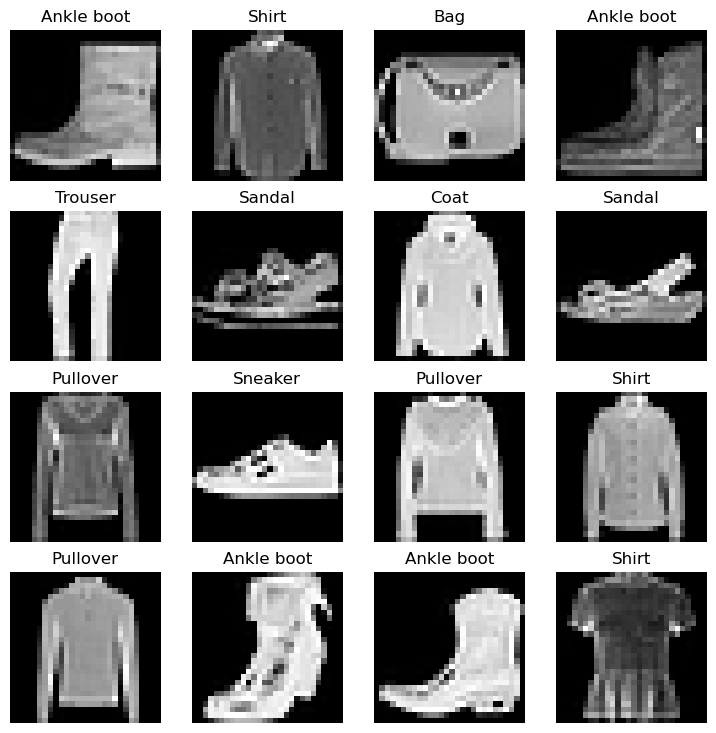

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

# 2. Prepear DataLoader

Right now data is in the format of PyTorch Dataset.

DataLoader turns our Dataset into a Python iterable
Specifically we turn our data into batches (or mini-batches)

1. It is more computationally efficient, as in, computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. it's give our neural network more chanses to update its gradient per epoch.

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2abbba62b40>,
 <torch.utils.data.dataloader.DataLoader at 0x2abba27fa10>)

In [13]:
# Lets check what we got

print(f"DatgaLoaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of 32")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of 32")

DatgaLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002ABBBA62B40>, <torch.utils.data.dataloader.DataLoader object at 0x000002ABBA27FA10>)
Lenght of train_dataloader: 1875 batches of 32
Lenght of test_dataloader: 313 batches of 32


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Lable: 8, Label size: torch.Size([])


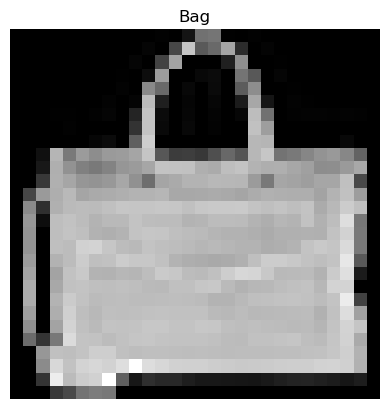

In [15]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"Lable: {label}, Label size: {label.shape}")

# 3. Model 0: Bild a Baseline Model

When starting to bild a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baceline model is a simple  model you wil try and improve upon with subsequent model/experiments. 

In [16]:
# Create a Flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform fwd pass 

print(f"Shape before flatten: {x.shape} -> [color_channel, height, width]")
print(f"Shape afte flaten: {output.shape} -> [color_channel, height * width]")

Shape before flatten: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Shape afte flaten: torch.Size([1, 784]) -> [color_channel, height * width]


In [17]:
class FashionMNISTModevV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_layers: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_layers),
            nn.Linear(in_features=hidden_layers, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)
model_0 = FashionMNISTModevV0(
    input_shape=784, # this is 28*28 - Shape before flatten: torch.Size([1, 28, 28]) -> [color_channel, height, width]
    hidden_layers=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModevV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand(1, 1, 28, 28) # (batch = 1, color_channels = 1, hight = 28, width = 28)
model_0(dummy_x) # -> give us output 10 logits

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0(dummy_x).shape

torch.Size([1, 10])

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup Loss, optimizer and evaluation metrics

* Loss - nn.CrossEntropyLoss()
* optimizer - SGD
* Evaluation metrics - since we are working on a classification problem, use accuracy as our Evaluation metrics

In [22]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("Helper function.py already exist")
else:
    print("Downloading Helper_function.py")
    request = request.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)

Helper function.py already exist


In [23]:
# import accuracy function fm helper_functions.py
from helper_function import accuracy_fn

# Setup Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## 3.2 Careate function to time our experiments

* Model perfomance (Loss and accuracy values etc)
* How fast it runs 

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """ Print difference fm start and end time """
    total_time = end - start
    print(f"Train time on {device} : {total_time:.2f} seconds")
    return total_time

In [25]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu : 0.00 seconds


7.509998977184296e-05

## 3.3 Creating a training loop and test model on branch of data 

1. Loop through epochs.
2. Loop through training batches, perform trainig step, calculate train loss *per batch*.
3. Loop through testin batches, perform testing step, calculate test loos *per batch*.
4. Print what happening
5. Running time

In [26]:
from tqdm.auto import tqdm 

In [27]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n ------")
    ### Training
    train_loss = 0
    ### Add a loop to loop thorigh the trainig batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        ### Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Batch: {batch} | Look at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
            
    # Devide total train loss by length of training dataloader
    train_loss /= len(train_dataloader)

    ### Testing loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Calculate traing time
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_start_time, end=train_time_end, device=str(next(model_0.parameters()).device))
            

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ------
Batch: 0 | Look at 0/60000 samples
Batch: 400 | Look at 12800/60000 samples
Batch: 800 | Look at 25600/60000 samples
Batch: 1200 | Look at 38400/60000 samples
Batch: 1600 | Look at 51200/60000 samples

Train loss: 0.5904 | Test loss: 0.5095, Test Acc: 82.0387
Epoch: 1
 ------
Batch: 0 | Look at 0/60000 samples
Batch: 400 | Look at 12800/60000 samples
Batch: 800 | Look at 25600/60000 samples
Batch: 1200 | Look at 38400/60000 samples
Batch: 1600 | Look at 51200/60000 samples

Train loss: 0.4763 | Test loss: 0.4799, Test Acc: 83.1969
Epoch: 2
 ------
Batch: 0 | Look at 0/60000 samples
Batch: 400 | Look at 12800/60000 samples
Batch: 800 | Look at 25600/60000 samples
Batch: 1200 | Look at 38400/60000 samples
Batch: 1600 | Look at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4766, Test Acc: 83.4265
Train time on cpu : 42.23 seconds


# 4 Make predictions and get Model_0 results 

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModevV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

# 5 Device agnostic-code

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 6. Model_1 Bild a better model with non_linearity

In [31]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_layers: int,
                 output_shape: int):
        super().__init__()
        self.stack_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.stack_layer(x)

model_1 = FashionMNISTModelV1(input_shape=784, hidden_layers=10, output_shape=10).to(device)
model_1

FashionMNISTModelV1(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [32]:
non_linea_loss_fn = nn.CrossEntropyLoss()
non_linea_optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## 6.1 Creat funtion for training/testin loop

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device):
    """ Performs a training with model trying to learn on data_loader. """

    train_loss, train_acc = 0, 0
    model.train()
    
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)
        # Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        acc = acc_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
        train_acc += acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
        

In [34]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device: torch.device = device):
    """ Performs a testing with model on data_loader. """

    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
             
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += acc_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

In [35]:
torch.manual_seed(42)
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_1, data_loader=train_dataloader, loss_fn=non_linea_loss_fn, optimizer=non_linea_optimizer, acc_fn=accuracy_fn, device=device)
    test_step(model=model_1, data_loader=test_dataloader, loss_fn=non_linea_loss_fn, acc_fn=accuracy_fn, device=device)
train_time_end = timer()
total_time_model_1 = print_train_time(start=train_start_time, end=train_time_end, device=str(next(model_0.parameters()).device))
print(f"Total train time: {total_time_model_1:.1f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.1146 | Train Acc: 58.46%
Epoch: 1
-------
Train Loss: 0.9091 | Train Acc: 64.87%
Epoch: 2
-------
Train Loss: 0.5951 | Train Acc: 78.25%
Train time on cpu : 86.70 seconds
Total train time: 86.7


In [36]:
# Get Model_1 results dictionary
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.49707889556884766,
 'model_acc': 82.76757188498402}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModevV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

# 7. Model_2 Convolutional Neural Network (CNN)

In [38]:
# Create a Convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_layers: int,
                 outout_shape: int
                ):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
            nn. ReLU(),
            nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*7*7, # there's a trick to calculate this...
                      out_features=outout_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of Conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of Conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of Classifier: {x.shape}")
        return x
                 

In [39]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # because out image has gray color, imput_shape = 1. When you're using colors image, input_shape will be = 3
                              hidden_layers=10,
                              outout_shape=len(class_names) # we have 10 classes
                             ).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

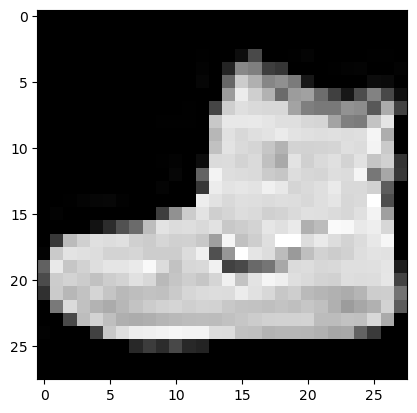

In [40]:
plt.imshow(image.squeeze(), cmap="gray")

In [41]:
image.unsqueeze(0)
image.shape

torch.Size([1, 28, 28])

In [42]:
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

## 7.1 Setup loss and optimizer for model_2

In [43]:
loss_fn_model_2 = nn.CrossEntropyLoss()
optimizer_model_2 = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [44]:
torch.manual_seed(42)
timer_strat = timer()
elpchs = 3

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn_model_2, optimizer=optimizer_model_2, acc_fn=accuracy_fn, device=device)
    test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn_model_2, acc_fn=accuracy_fn, device=device)
timer_end = timer()
total_time_model_2 = print_train_time(start=train_start_time, end=train_time_end, device=str(next(model_0.parameters()).device))
print(f"Toatal time: {total_time_model_2:.1f}")

Epoch: 0
-------
Train Loss: 0.5932 | Train Acc: 78.52%
Epoch: 1
-------
Train Loss: 0.3607 | Train Acc: 87.01%
Epoch: 2
-------
Train Loss: 0.3248 | Train Acc: 88.25%
Train time on cpu : 86.70 seconds
Toatal time: 86.7


## 7.2 Model_2 results

In [45]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn_model_2, accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32335588335990906,
 'model_acc': 88.37859424920129}

# 8 Comparing Model's results

In [46]:
import pandas as pd

In [47]:
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModevV0,0.476639,83.426518
1,FashionMNISTModelV1,0.497079,82.767572
2,FashionMNISTModelV2,0.323356,88.378594


## 8.1 Add training time to results comparison

In [48]:
compare_results["training_time"] = [total_train_time_model_0, total_time_model_1, total_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModevV0,0.476639,83.426518,42.226803
1,FashionMNISTModelV1,0.497079,82.767572,86.699719
2,FashionMNISTModelV2,0.323356,88.378594,86.699719


## 8.2 Visualize our model results

Text(0, 0.5, 'Model')

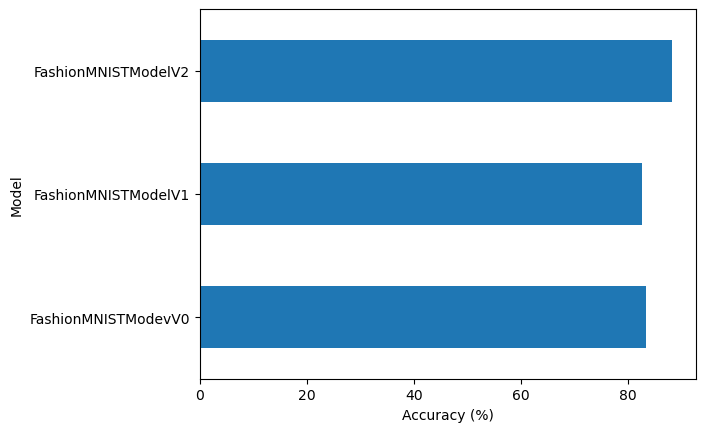

In [49]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

# 9 Make and evaluate random predition with best model  

In [50]:
def make_prediction(model: torch.nn.Module,
                   data: list,
                   device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample (add a batch dimention and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outpus raw logits)
            pred_logit = model(sample)

            # Get predictionprobability (logitn -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_brob off the CPU  for further calculation 
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [51]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [52]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

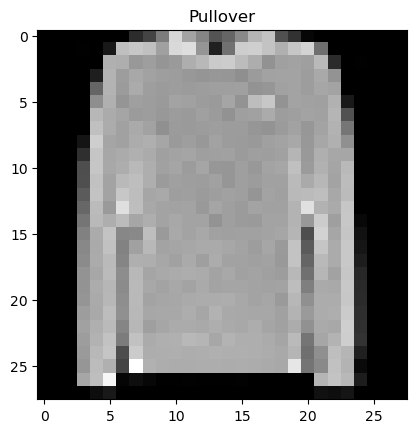

In [53]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [54]:
# Make preditions 
pred_probs = make_prediction(model=model_2, data=test_samples)
pred_probs[:2]

tensor([[3.6032e-03, 5.4330e-04, 8.6633e-01, 1.2910e-03, 6.3021e-02, 4.0159e-05,
         6.3904e-02, 3.3249e-05, 1.0791e-03, 1.6042e-04],
        [6.5526e-04, 4.2432e-05, 6.5923e-04, 2.5170e-03, 9.7842e-01, 6.5693e-07,
         1.4701e-02, 1.1940e-06, 2.9858e-03, 1.3603e-05]])

In [55]:
# Convert prediction probabilitys to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 0, 8, 8, 9, 5, 9, 6])

In [56]:
test_labels

[2, 4, 0, 8, 8, 9, 7, 9, 6]

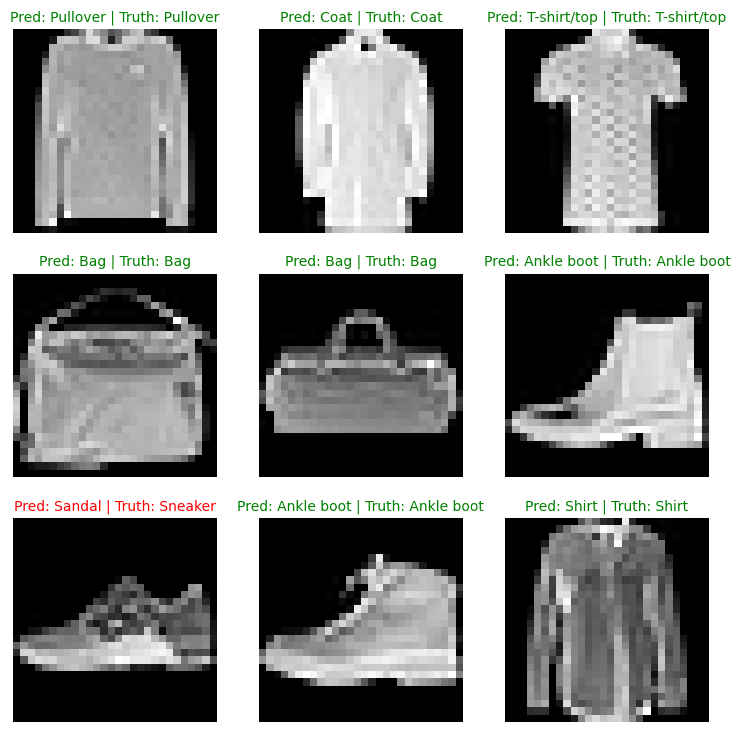

In [57]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Creat subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text format)
    pred_label = class_names[pred_classes[i]]

    # Get the Truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of titel text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="green")
    else:
        plt.title(title_text, fontsize=10, c="red")

    plt.axis(False)

# 10 Making a confusion matrix for furthre prediction evaluation  
1. Make prediction with our trained model on the test dataset
2. Make a confusion matrix `torchmatrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [58]:
# 1. Make prediction with our trained model on the test dataset
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
    # Concatinete list of prediction into a thensor
    print(y_preds[:10])
    y_pred_tensor = torch.cat(y_preds)
    y_pred_tensor[:10]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 9, 6, 7, 2, 1, 4, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 3, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 6, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 6, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        2, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

In [59]:
try:
    import torchmetrics
    import mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1], "mlxtend version shoud be 0.19.0 or highre")
except:
    !pip install torchmetrics; mlxtend
    import torchmetrics
    import mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4
mlxtend version: 0.23.4


In [60]:
import mlxtend

In [61]:
mlxtend.__version__

'0.23.4'

In [62]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and conpare prediction to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[643,   5,  52,  58,  13,   0, 225,   0,   4,   0],
        [ 13, 882,   7,  83,  11,   0,   4,   0,   0,   0],
        [  8,   2, 824,  12,  93,   0,  58,   0,   3,   0],
        [ 19,  11,  29, 859,  44,   0,  30,   0,   6,   2],
        [  5,   4, 142,  41, 713,   0,  93,   0,   2,   0],
        [  9,   1,   8,   4,   2, 828,   5,  47,  75,  21],
        [ 73,   6, 122,  60,  92,   1, 639,   0,   7,   0],
        [  1,   2,   1,   0,   0,  28,   0, 901,  13,  54],
        [ 12,   2,  34,  17,   9,   6,  33,   7, 879,   1],
        [  0,   1,   0,   2,   0,  22,   4,  79,  12, 880]])

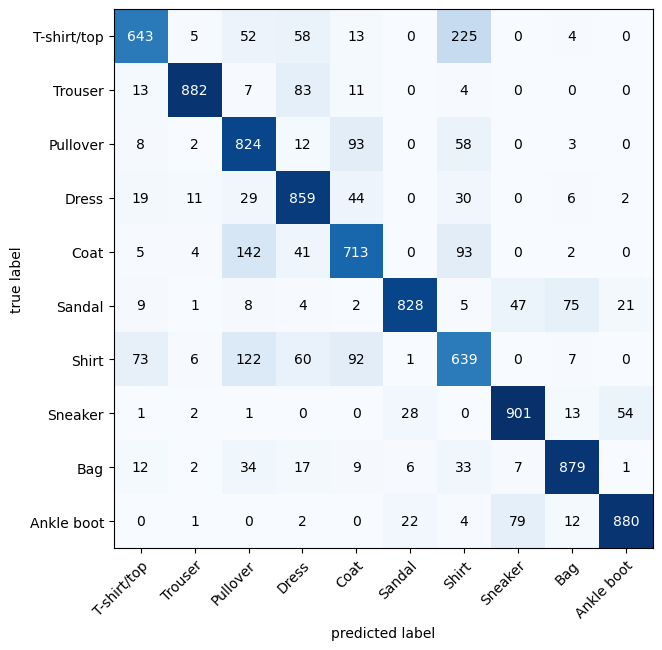

In [64]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

# 11 Save and loading model

In [67]:
from pathlib import Path

In [68]:
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)
model_name = "03_PyTorch_computer_vision_model_2.pth"
model_save_path = model_path / model_name
model_save_path
torch.save(obj=model_2.state_dict(), f=model_save_path)